In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os
from array import array

### GLOBAL VARIABLES

In [2]:
GRAP_SIMBOL = '_'

# Specify the path to your text file
SEQUENCE_FILE = r"Secuencias.txt"
#SEQUENCE_FILE = r'C:\Users\Sergio\Documents\Sergio Lopez\Universidad\6to semestre\Analisis y modelacion de sistemas\Alineamineto genetico\Secuencias.txt'
#SEQUENCE_FILE = r'C:\Users\Sergio\Documents\Sergio Lopez\Universidad\6to semestre\Analisis y modelacion de sistemas\Alineamineto genetico\Secuencias_Nombres.txt'

### Code

In [3]:
def insert_randomly(input_string, characters_to_insert):
    new_string = list(input_string) 
    for char in characters_to_insert:
        index = random.randint(0, len(new_string))
        new_string.insert(index, char)
    return ''.join(new_string)

In [4]:
class Cell :
    
    def __init__(self, sequence):
        self.sequence = sequence
        self.width = len(sequence)
        self.gaps_num = 0
    
    def muatate(self, gaps_num):
        
        for i in range(gaps_num) : 
            self.sequence = insert_randomly(self.sequence , GRAP_SIMBOL)#CHANGE THE 'M' CHARACTER TO '_'
        self.width = len(self.sequence)

In [5]:
# Define a function to parse the sequences from the text file
def parse_sequences(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        sequence = ""
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if sequence:
                    sequences.append(sequence)
                sequence = ""
            else:
                sequence += line
        if sequence:
            sequences.append(sequence)
    return np.array(sequences)


In [6]:

def create_main_data_set(SEQUENCE_FILE = '',sequence_array_parameter = np.array([]), mutate_lavel = 2):
    #READ THE FILE AND EXTRACT HOW MANY CELLS IT HAS INVOLVE

    cells_array = np.array([])
    
    
    sequences_array = sequence_array_parameter
    if len(sequence_array_parameter) == 0:
        # Call the function to parse sequences and store them in a NumPy array
        sequences_array = parse_sequences(SEQUENCE_FILE)
    
    
        for i , sequence_string in enumerate(sequences_array):
            random_word = sequence_string
            #random_word = array_words[0] #REMOVE THIS LINE AND DISCOMMENT THE LAST ONE
            cell = Cell(random_word)

            if mutate_lavel == 1:
                graps_num = random.randint(0, round(len(cell.sequence) / 4) )
            if mutate_lavel == 2:
                graps_num = random.randint(0, round(len(cell.sequence) / 2) )

            cell.muatate(graps_num) 
            cell.sequence

            cells_array = np.append(cells_array, cell)
        return cells_array
    else :
        for i, cell in enumerate(sequences_array):
            if mutate_lavel == 1:
                        graps_num = random.randint(0, round(len(cell.sequence) / 4) )
            if mutate_lavel == 2:
                graps_num = random.randint(0, round(len(cell.sequence) / 2) )

            cell.muatate(graps_num) 
            cell.sequence

            cells_array = np.append(cells_array, cell)
        
    return cells_array
        
#cells_array = create_main_data_set(SEQUENCE_FILE, mutate_lavel = 1)
#cells_array

In [7]:
def create_matrix_sequence(cells_array):
 
    array_cells_width = np.array([cell.width for cell in cells_array])
    
    #MODIFY THE * TO _ 
    matrix_sequence = np.array([[GRAP_SIMBOL for _ in range(max(array_cells_width))] for _ in range(len(cells_array))])
    
    matrix_cells_sequence = [list(cell.sequence) for cell in cells_array]
    

    for i, row in enumerate(matrix_cells_sequence):
        for j, column in enumerate(matrix_cells_sequence[i]):
            matrix_sequence[i][j] = matrix_cells_sequence[i][j]
    
    return matrix_sequence
#matrix_sequence = create_matrix_sequence(cells_array)

#print(matrix_sequence.shape)
#matrix_sequence

In [8]:
def evaluation(matrix_sequence):
    num_rows, num_columns = matrix_sequence.shape
    same_value_columns = []
    
    #COUNT THE GOOD POINTS
    for col in range(num_columns):
        column_values = matrix_sequence[:, col]
        if column_values[0] != GRAP_SIMBOL :
            is_same = all(column_values == column_values[0])
            same_value_columns.append(is_same)

    #print(same_value_columns)
    count_same_value_columns = np.count_nonzero(same_value_columns)
        
    good_points = num_rows * count_same_value_columns
    
    #COUNT THE BAD POINTS '_'
    
    bad_points = np.count_nonzero(matrix_sequence == GRAP_SIMBOL)
    
    return good_points , bad_points


#matrix_sequence[ : , 1] = 'A' #JUST TO MAKE TESTES

#good_points , bad_points = evaluation(matrix_sequence)



#print(f"The good points number : {good_points}")
#print(f"The bad points number : {bad_points}")

In [9]:
def evaluation(matrix_sequence):
    num_rows, num_columns = matrix_sequence.shape
    max_repeated_columns = []  # Store the count of most repeated characters in each column
    
    for col in range(num_columns):
        column_values = matrix_sequence[:, col]
        
        if column_values[0] != GRAP_SIMBOL:
            unique_values, counts = np.unique(column_values, return_counts=True)
            max_count = np.max(counts)
            max_repeated_columns.append(max_count)

    good_points = sum(max_repeated_columns)
    bad_points = np.count_nonzero(matrix_sequence == GRAP_SIMBOL)
    
    return good_points, bad_points

In [10]:
def iterator(N_ITERATIONS, data_set = []):
    universe = []
    
    for i in range(N_ITERATIONS):
        if len(data_set) == 0:
            cells_array = create_main_data_set(SEQUENCE_FILE, mutate_lavel = 1)
        else:
            cells_array = create_main_data_set(sequence_array_parameter = data_set, mutate_lavel = 1)
        matrix_sequence = create_matrix_sequence(cells_array)
        good_points , bad_points = evaluation(matrix_sequence)
        
        content = {
            'matrix_sequence' : matrix_sequence,
            'good_points' : good_points,
            'bad_points' : bad_points,
            'average' : good_points / bad_points * 100
        }
        
        universe.append(content)
    return universe
    
result = iterator(5)
print(result)

[{'matrix_sequence': array([['A', 'A', 'G', ..., '_', '_', '_'],
       ['C', 'A', 'G', ..., 'T', 'C', '_'],
       ['C', 'T', 'T', ..., '_', '_', '_'],
       ['A', 'A', 'G', ..., '_', '_', '_'],
       ['C', 'A', 'G', ..., '_', '_', '_'],
       ['_', 'C', 'T', ..., '_', '_', '_']], dtype='<U1'), 'good_points': 297, 'bad_points': 440, 'average': 67.5}, {'matrix_sequence': array([['_', 'A', 'A', ..., '_', '_', '_'],
       ['C', '_', 'A', ..., 'G', 'T', 'C'],
       ['C', 'T', 'T', ..., '_', '_', '_'],
       ['A', 'A', 'G', ..., '_', '_', '_'],
       ['C', 'A', 'G', ..., '_', '_', '_'],
       ['C', 'T', 'T', ..., '_', '_', '_']], dtype='<U1'), 'good_points': 298, 'bad_points': 416, 'average': 71.63461538461539}, {'matrix_sequence': array([['A', 'A', 'G', ..., '_', '_', '_'],
       ['C', '_', 'A', ..., '_', '_', '_'],
       ['C', 'T', 'T', ..., '_', '_', '_'],
       ['A', '_', 'A', ..., '_', '_', '_'],
       ['C', 'A', '_', ..., 'G', 'T', 'C'],
       ['C', 'T', 'T', ..., '_', '

In [11]:
def convert_matrix_to_string(matrix):
    matrix_sequence = []
    matrix = matrix[0]['matrix_sequence'].tolist()
    new_matrix = []
    
    
    
    for index, item in enumerate(matrix):
            new_matrix.append(''.join(item))
        
    for index, item in enumerate(new_matrix):
        matrix_sequence.append(Cell(item))
        
    return matrix_sequence

In [12]:
def export_dataframe(matrix_sequence):
    #OPEN THE DATAFRAME IN EXCEL FILE
    pd.DataFrame(matrix_sequence).to_csv(r'output.csv')

    filename = r"C:\Users\Sergio\Documents\Sergio Lopez\Universidad\6to semestre\Analisis y modelacion de sistemas\Alineamineto genetico\output.csv"

    # Enclose the file path in double quotes
    os.system('start excel.exe "{}"'.format(filename))

In [13]:
outcome_mutation = {}

In [14]:
saved_iteration = {
    'matrix_sequence' :[] ,
    'good_points' : 0,
    'bad_points' : 0,
    'average' : 0
}

good_points = []
bad_points = []

In [15]:

#sequence_array_parameter create_main_data_set
#se tiene que retornar el json con el formato de good points bad ponits y matrix_sequence
def core_iterations(items, number_iterations, max_iterations, saved_iteration):
    new_items = []
   
    
    if len(new_items) == 0 : 
        new_items.append(items[0])
    
    if number_iterations == max_iterations :
        print('---------------------------------FINISHED----------------------------------------------------------')
        #print(items)
        #print(saved_iteration)
        
        outcome_mutation = saved_iteration['matrix_sequence']
        #print(outcome_mutation)
        export_dataframe(outcome_mutation)
        
        return saved_iteration
    
    matrix_sequence = convert_matrix_to_string(new_items)
    
    
    

    for index, item in enumerate(items):
        good_points.append(item['good_points'])
        bad_points.append(item['bad_points'])
        #print(item['average'])
        if item['good_points'] != 0:
            #new_items.append(item)
            #matrix_sequence = convert_matrix_to_string(new_items) #aqui debemos de avaluar cual es mejor para pasarla con matrix_sequence
            #print(item)
            if saved_iteration['average'] < item['average']:
                saved_iteration = item
                new_items.append(item)
                matrix_sequence = convert_matrix_to_string(new_items)
            #else : 
                #matrix_sequence = convert_matrix_to_string(new_items)
            #print("good_points")
    
    
    
    mutation = iterator(5, matrix_sequence)

    print(number_iterations)
    core_iterations(mutation , number_iterations + 1 , max_iterations , saved_iteration)
    
    
best_mutations = core_iterations(result , 0, 5, saved_iteration)
print('----------BEST MUTATION--------------------')
print(best_mutations)

0
1
2
3
4
---------------------------------FINISHED----------------------------------------------------------
----------BEST MUTATION--------------------
None


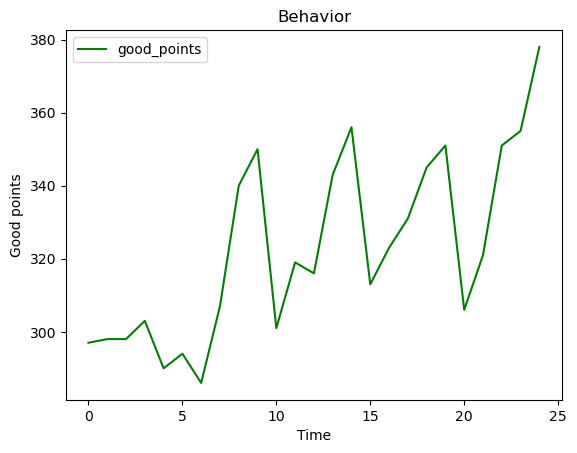

In [16]:
plt.plot([x for x, item in enumerate(good_points)] , good_points, label = 'good_points', color = 'green')
#plt.plot([x for x, item in enumerate(bad_points)] ,bad_points, label = 'bad_points', color = 'red')
plt.title('Behavior')
plt.xlabel('Time')
plt.ylabel('Good points')
plt.legend()
plt.show()

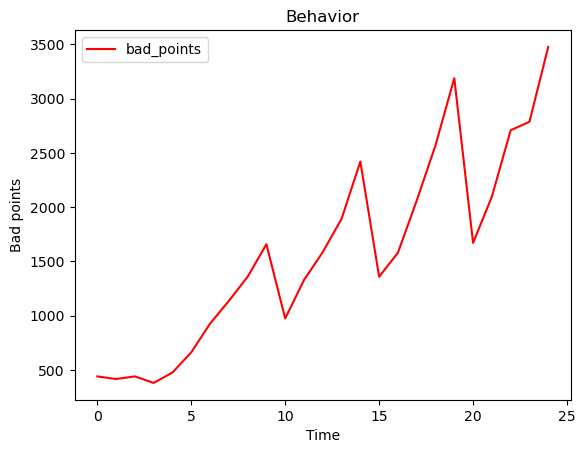

In [17]:
plt.plot([x for x, item in enumerate(bad_points)] ,bad_points, label = 'bad_points', color = 'red')
plt.title('Behavior')
plt.xlabel('Time')
plt.ylabel('Bad points')
plt.legend()
plt.show()

## TESTES

In [ ]:
good_points

In [ ]:
bad_points

In [ ]:
saved_iteration = {
    'matrix_sequence' :[] ,
    'good_points' : 0,
    'bad_points' : 0,
    'average' : 0
}

print(saved_iteration['average'])

In [ ]:
open  = False
for index, item in enumerate(result):
    if item['good_points'] != 0:
        pd.DataFrame( item['matrix_sequence'] ).to_csv(r'output.csv')
        filename = r"C:\Users\Sergio\Documents\Sergio Lopez\Universidad\6to semestre\Analisis y modelacion de sistemas\Alineamineto genetico\output.csv"

        # Enclose the file path in double quotes
        os.system('start excel.exe "{}"'.format(filename))
        print("good points")
        open = True
    
if open == False : 
    pd.DataFrame( result[0]['matrix_sequence'] ).to_csv(r'output.csv')
    filename = r"C:\Users\Sergio\Documents\Sergio Lopez\Universidad\6to semestre\Analisis y modelacion de sistemas\Alineamineto genetico\output.csv"
    print("only bad points")
    # Enclose the file path in double quotes
    os.system('start excel.exe "{}"'.format(filename))

In [ ]:
matrix_sequence.shape